In [1]:
%matplotlib inline


# Running $k$-means


Adapted from Phio Roth's notebook that comes with scikit-learn, this just shows how k-means
works with different settings.


Automatically created module for IPython interactive environment


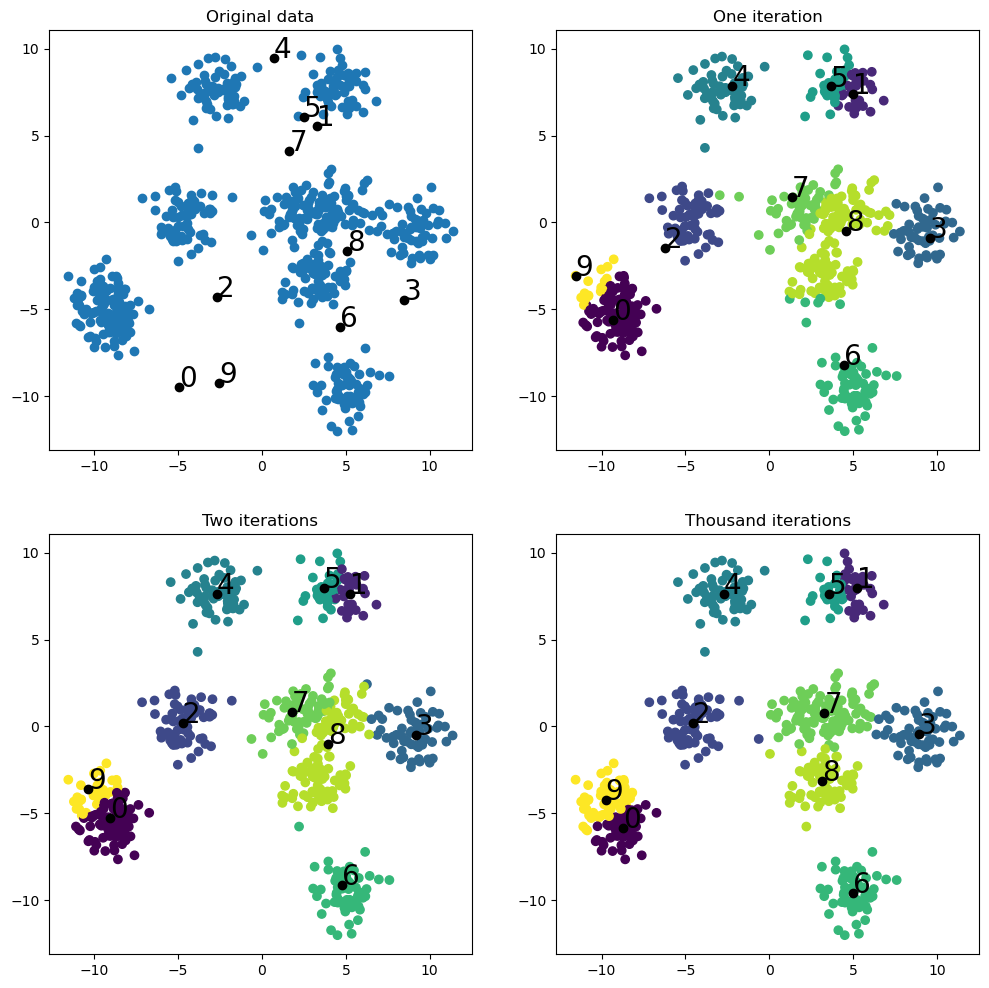

In [6]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 600
random_state = 170
nclusters = 10
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=nclusters)
start = 20*np.random.rand(nclusters,2) - 10

def kplot(centroids,title,c=None):
    plt.scatter(X[:, 0], X[:, 1],c=c)
    plt.scatter(centroids[:, 0], centroids[:, 1],
            color='black')
    for i in range(centroids.shape[0]):
        plt.text(centroids[i,0], centroids[i,1], str(i), fontsize=20)
    plt.title(title)    

def runkmeans(niter):
    km = KMeans(n_clusters=nclusters, n_init=1, max_iter=niter, init=start)
    y_pred = km.fit_predict(X)
    centroids = km.cluster_centers_
    return y_pred, centroids
    
plt.subplot(221)
kplot(start,'Original data')

y_pred, centroids = runkmeans(1)
plt.subplot(222)
kplot(centroids,'One iteration',c=y_pred)

y_pred, centroids = runkmeans(2)
plt.subplot(223)
kplot(centroids,'Two iterations',c=y_pred)

y_pred, centroids = runkmeans(1000)
plt.subplot(224)
kplot(centroids,'Thousand iterations',c=y_pred)

plt.show()